In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 캘리포니아 주택 데이터셋 불러오기
data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

* 주어진 변수는 캘리포니아 부동산 데이터셋의 특성(Feature)
1. **'MedInc'**: 주택 소득의 중앙값 (Median Income)
2. **'HouseAge'**: 주택의 중앙 연식 (Median House Age)
3. **'AveRooms'**: 평균 방 개수 (Average Rooms)
4. **'AveBedrms'**: 평균 침실 개수 (Average Bedrooms)
5. **'Population'**: 인구 수 (Population)
6. **'AveOccup'**: 평균 자가 비율 (Average Occupancy)
7. **'Latitude'**: 주택 위치의 위도 (Latitude)
8. **'Longitude'**: 주택 위치의 경도 (Longitude)

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [3]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [4]:
# 특성과 타겟 변수 선택
X = df[['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']]
y = df['target']

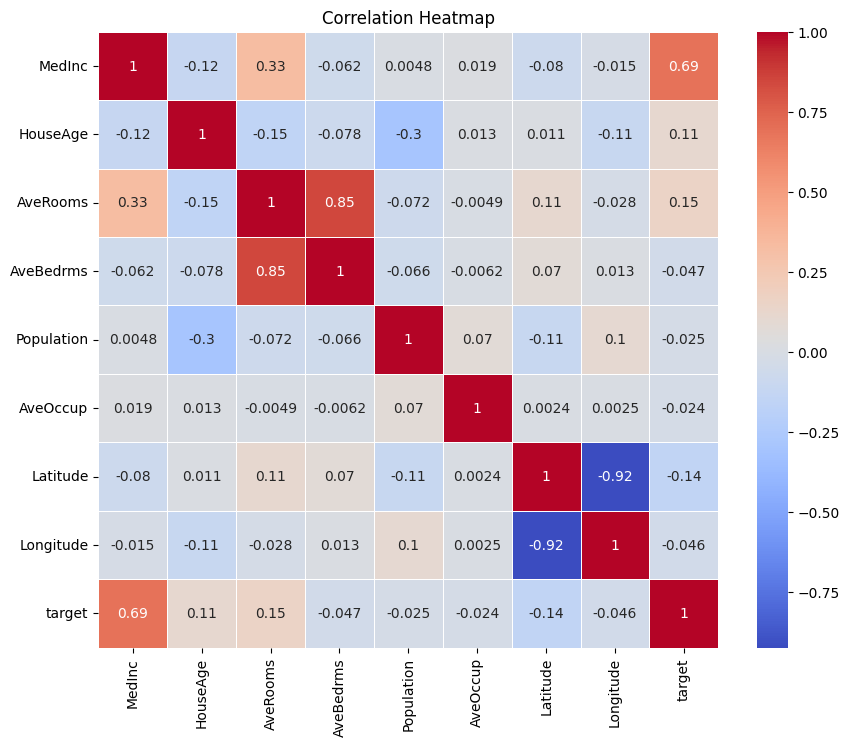

In [5]:
# 피처 간 상관관계 히트맵
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

### 변수의 변형

변수의 변형은 통계 모델을 개선하거나 모델의 가정을 충족시키기 위해 독립 변수나 종속 변수를 변형하는 과정을 의미합니다. 이를 통해 모델의 성능을 향상시키거나 모델이 데이터에 더 잘 적합되도록 할 수 있습니다. 두 가지 일반적인 변수 변형 방법으로는 로그 함수와 I 함수가 있습니다.

#### 1. 로그 함수 (Logarithmic Transformation)

로그 함수는 자연 로그(natural logarithm)를 이용하여 변수를 변형하는 방법입니다. 주로 양수 값이나 비율척도로 측정된 변수의 분포를 정규 분포에 가깝게 만들거나, 변수의 변동성을 안정화하고, 비선형 관계를 선형으로 바꿀 때 사용됩니다.

수식: \( y' = \log(y) \)

#### 2. I 함수 (Indicator Function)

I 함수는 조건에 따라 변수를 변형하는 함수로, 조건을 만족하는 경우에는 새로운 값을 부여하고 만족하지 않는 경우에는 기존 값 그대로를 사용합니다. 주로 범주형 변수를 수치형으로 변환하거나, 특정 조건을 만족하는 경우에 변수에 특정 가중치를 부여하기 위해 사용됩니다.

수식:
\[ y' = \begin{cases}
c & \text{if 조건 충족} \\
y & \text{if 조건 미충족}
\end{cases} \]

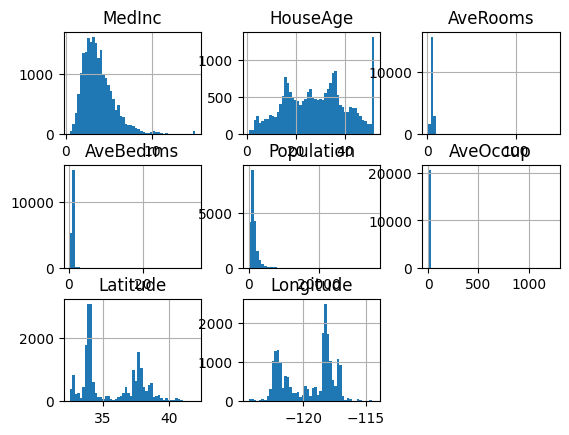

In [6]:
X.hist(bins=50);

## 로그 변환


<img src="https://upload.wikimedia.org/wikipedia/commons/8/81/Logarithm_plots.png" width="300">


로그(log)는 지수 함수의 역함수이다. 어떤 수를 나타내기 위해 고정된 밑을 몇 번 곱하여야 하는지를 나타낸다고 볼 수 있다.

이른 17세기에 곱하기 및 나누기의 계산을 간편하게 해내기 위해 존 네이피어가 발명한 것으로 알려져 있다. 복잡한 단위의 계산을 간편하게 계산할 수 있다는 장점 때문에, 로그표 및 계산자 등의 발명품과 함께 세계적으로 여러 분야의 학자들에게 널리 퍼졌다.

지수에 대비된다는 의미에서 중국과 일본에서는 대수(對數)로 부르기도 하나, 대수(代數, algebra)와 헷갈리기 쉬우므로 로그라는 용어를 사용하는 것이 일반적이다.


* https://en.wikipedia.org/wiki/Logarithm
* [로그 (수학) - 위키백과, 우리 모두의 백과사전](https://ko.wikipedia.org/wiki/%EB%A1%9C%EA%B7%B8_(%EC%88%98%ED%95%99))
* [자연로그 - 위키백과, 우리 모두의 백과사전](https://ko.wikipedia.org/wiki/%EC%9E%90%EC%97%B0%EB%A1%9C%EA%B7%B8) :  e를 밑으로 하는 로그
* [자연로그의 밑 - 위키백과, 우리 모두의 백과사전](https://ko.wikipedia.org/wiki/%EC%9E%90%EC%97%B0%EB%A1%9C%EA%B7%B8%EC%9D%98_%EB%B0%91)
* [상용로그 - 위키백과, 우리 모두의 백과사전](https://ko.wikipedia.org/wiki/%EC%83%81%EC%9A%A9%EB%A1%9C%EA%B7%B8) : 10진 로그 혹은 밑이 10인 로그

In [10]:
X.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MedInc_log'],
      dtype='object')

In [11]:
X["MedInc_log"] = np.log1p(X["MedInc"])
X["Population_log"] = np.log(X["Population"] + 1)

<Axes: >

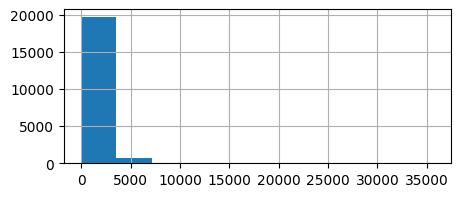

In [18]:
# log => 원래 값으로 복원
(np.exp(X["Population_log"]) - 1).hist(figsize=(5, 2))

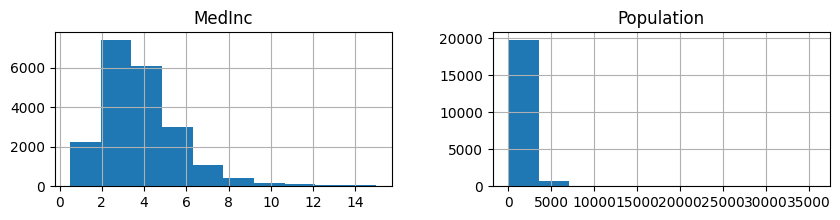

In [14]:
X[["MedInc", "Population"]].hist(figsize=(10, 2));

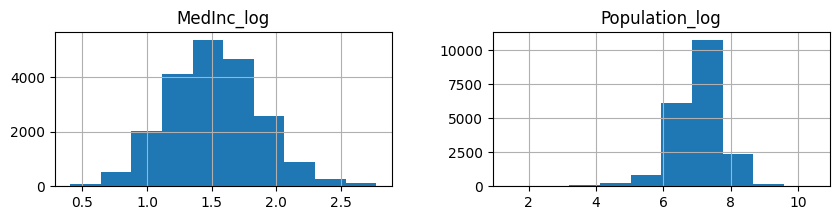

In [13]:
X[["MedInc_log", "Population_log"]].hist(figsize=(10, 2));

In [20]:
X_trasform = X.drop(columns=["MedInc", "Population"])
X_trasform.head()

,HouseAge,AveRooms,AveBedrms,AveOccup,Latitude,Longitude,MedInc_log,Population_log
0,41.0,6.984127,1.023810,2.555556,37.88,-122.23,2.232720,5.777652
1,21.0,6.238137,0.971880,2.109842,37.86,-122.22,2.230165,7.784057
2,52.0,8.288136,1.073446,2.802260,37.85,-122.24,2.111110,6.208590
3,52.0,5.817352,1.073059,2.547945,37.85,-122.25,1.893579,6.326149
4,52.0,6.281853,1.081081,2.181467,37.85,-122.25,1.578195,6.338594


In [27]:
# 데이터 정규화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_trasform)
pd.DataFrame(X_scaled, columns=X_trasform.columns).describe().round(4)

,HouseAge,AveRooms,AveBedrms,AveOccup,Latitude,Longitude,MedInc_log,Population_log
count,20640.0000,20640.0000,20640.0000,20640.0000,20640.0000,20640.0000,20640.0000,20640.0000
mean,0.0000,0.0000,-0.0000,0.0000,-0.0000,-0.0000,-0.0000,-0.0000
std,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
min,-2.1962,-1.8523,-1.6108,-0.2290,-1.4476,-2.3860,-3.0992,-7.6597
25%,-0.8454,-0.3994,-0.1912,-0.0617,-0.7968,-1.1132,-0.6867,-0.4836
50%,0.0286,-0.0808,-0.1011,-0.0243,-0.6423,0.5389,-0.0145,0.0498
75%,0.6643,0.2520,0.0060,0.0204,0.9730,0.7785,0.6441,0.5814
max,1.8562,55.1632,69.5717,119.4191,2.9581,2.6253,3.5007,4.6955


In [28]:
# 훈련 및 테스트 데이터셋 분리
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

sm.add_constant는 상수항을 추가하는 함수이며, OLS 모델을 초기화하고 피팅한 후 summary() 메서드를 호출하여 모델 요약 정보를 출력합니다.

모델 요약 정보에는 각 계수의 통계적 유의성, R-squared, F-statistic 등이 포함되어 있습니다. 특히, coef 열은 각 피처의 회귀 계수를 나타내며, P>|t| 열은 해당 계수의 p-value를 나타냅니다.

In [29]:
import statsmodels.api as sm

# 상수항 추가
X_train_ols = sm.add_constant(X_train)

# OLS 모델 피팅
model_ols = sm.OLS(y_train, X_train_ols).fit()

* **결정 계수 (R-squared):**

결정 계수는 회귀 분석 모델이 종속 변수의 변동성을 얼마나 잘 설명하는지를 나타내는 통계적 측도로, 다음과 같이 정의됩니다:

\[ $R^2 = 1 - \frac{\text{SSE (Sum of Squared Residuals)}}{\text{SSTO (Total Sum of Squares)}}$ \]

여기서,
- $SSE$는 잔차의 제곱합으로, 모델이 설명하지 못하는 변동을 나타냅니다.
- $SSTO$는 종속 변수의 전체 변동으로, 평균과의 차이의 제곱합으로 이루어져 있습니다.

결정 계수는 0에서 1 사이의 값을 가지며, 1에 가까울수록 모델이 데이터를 완벽하게 설명한다는 것을 의미합니다.

* **조정된 결정 계수 (Adjusted R-squared):**

조정된 결정 계수는 결정 계수를 개선한 지표로, 독립 변수의 수에 대한 페널티를 부여하여 모델의 복잡성을 조절합니다. 조정된 결정 계수는 다음과 같이 정의됩니다:

\[ $\text{Adjusted } R^2 = 1 - \frac{(1 - R^2) \cdot (n - 1)}{n - k - 1}$ \]

여기서,
- \($n$\)은 샘플의 수,
- \($k$\)는 모델에 포함된 독립 변수의 수입니다.

조정된 결정 계수는 독립 변수의 추가 또는 제거에 따라 변화하며, 모델의 복잡성을 고려하여 결정 계수를 조절합니다. 이는 모델이 추가된 변수가 실제로 유의미한 향상을 가져오는지를 고려하여 모델의 해석력을 향상시킵니다.

* **Log-Likelihood (로그 우도):**

    * 로그 우도는 확률 분포의 모수를 추정하는 모델에서 주어진 데이터가 발생할 확률의 로그를 나타냅니다. 일반적으로 최대 로그 우도를 찾는 것이 모델의 적합도를 측정하는 중요한 지표 중 하나입니다. 더 높은 로그 우도는 모델이 주어진 데이터를 더 잘 설명한다는 것을 의미합니다.

\[ $\text{Log-Likelihood} = \sum_{i=1}^{n} \log(f(x_i; \theta))$ \]

여기서,
- \($n$\)은 데이터 포인트의 수,
- \($f(x_i; \theta)$\)는 확률 밀도 함수 또는 확률 질량 함수입니다,
- \($\theta$\)는 모델의 모수를 나타냅니다.



* **AIC (Akaike Information Criterion):**

    * AIC는 모델의 성능을 측정하는 지표 중 하나로, 모델의 적합도와 모델의 복잡성(파라미터 수) 사이의 균형을 제공합니다. AIC는 로그 우도와 모델의 파라미터 수를 고려하여 계산되며, 더 낮은 AIC 값은 더 좋은 모델을 나타냅니다.

* **BIC (Bayesian Information Criterion):**

    * BIC는 AIC와 유사한 목적을 가지고 있지만, 모델의 파라미터 수에 대한 페널티를 더 강조합니다. BIC는 로그 우도와 파라미터 수를 고려하여 계산되며, 더 낮은 BIC 값은 더 좋은 모델을 나타냅니다. AIC와 BIC는 모델 선택 시 고려해야 할 지표 중 하나이며, 적합한 모델을 선택하는 데 도움을 줍니다.



* **F-statistic (F 통계량):**
    * F 통계량은 회귀 모델 전체의 통계적 유의성을 평가하는 데 사용됩니다. 즉, 최소한 하나의 회귀 계수가 0이 아닌지 여부를 검증합니다. F 통계량이 클수록 적어도 하나의 독립 변수가 종속 변수에 유의미한 영향을 미친다는 증거가 더 강력합니다. 따라서 F 통계량이 유의미하면 최소한 하나의 변수는 종속 변수에 영향을 미칩니다.

* **Prob (F-statistic):**
    * Prob (F-statistic)는 F 통계량의 p-value를 나타냅니다. 이 값이 작을수록 회귀 모델 전체가 통계적으로 유의미하다는 것을 나타냅니다. 즉, 적어도 하나의 독립 변수가 종속 변수에 유의미한 영향을 미친다는 귀무 가설을 기각할 수 있는지 여부를 판단하는데 사용됩니다.


* **모델 진단**
    * Omnibus: 잔차의 정규성을 검정하는데 사용됩니다. 이 값이 작을수록 정규성 가정에 더 가깝습니다.
    * Durbin-Watson: 자기상관을 검정하는데 사용됩니다. 보통 1.5에서 2.5 사이의 값이 이상적입니다.
    * Prob(Omnibus): Omnibus 검정의 p-value. 낮을수록 정규성 가정에 위배될 가능성이 높습니다.
    * Jarque-Bera (JB): 잔차의 왜도와 첨도에 대한 검정을 수행합니다. 작을수록 정규성에 가깝습니다.
    * Prob(JB): JB 검정의 p-value. 낮을수록 정규성 가정에 위배될 가능성이 높습니다.
    * Skew (왜도): 왜도가 0에 가까울수록 정규성에 가깝습니다.
    * Kurtosis (첨도): 첨도가 3에 가까울수록 정규성에 가깝습니다.
    * Cond. No.: 다중공선성을 확인하기 위한 조건 지수입니다.
    
* **주의 사항**
    * Covariance Type: nonrobust. 공분산 행렬의 유형으로, 이 경우는 로버스트하지 않음을 의미합니다.
    * Standard Errors assume that the covariance matrix of the errors is correctly specified.
    * 잔차의 공분산 행렬이 정확하게 명시되었다는 가정하에 표준 오차가 계산되었다는 의미입니다.

In [30]:
# 모델 요약 정보 출력
print(model_ols.summary())

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.584
Model:                            OLS   Adj. R-squared:                  0.584
Method:                 Least Squares   F-statistic:                     2901.
Date:                Thu, 01 Feb 2024   Prob (F-statistic):               0.00
Time:                        06:44:18   Log-Likelihood:                -18577.
No. Observations:               16512   AIC:                         3.717e+04
Df Residuals:                   16503   BIC:                         3.724e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0681      0.006    356.425      0.0

In [31]:
# 선형 회귀 모델 초기화 및 피팅
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [32]:
# 모델 평가
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 0.5899196008854396
R-squared: 0.549820238810214


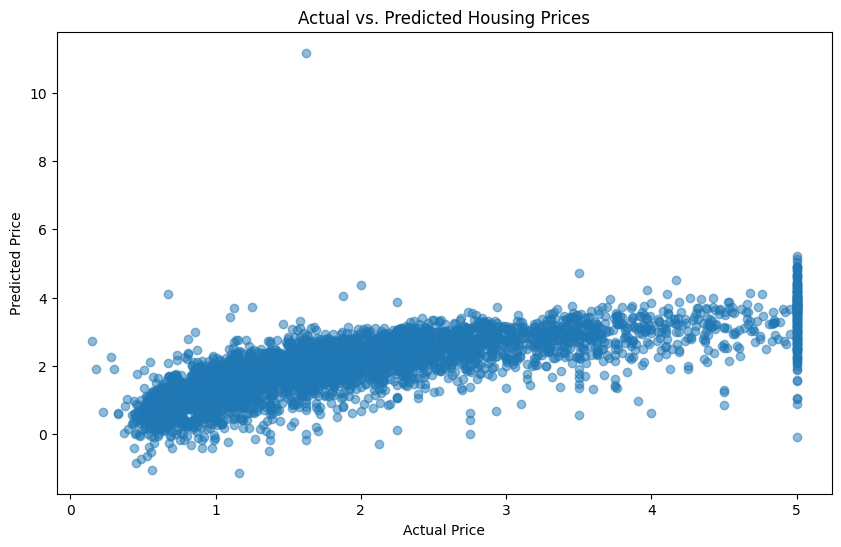

In [33]:
# 실제 주택 가격과 예측 가격 비교
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title('Actual vs. Predicted Housing Prices')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.show()

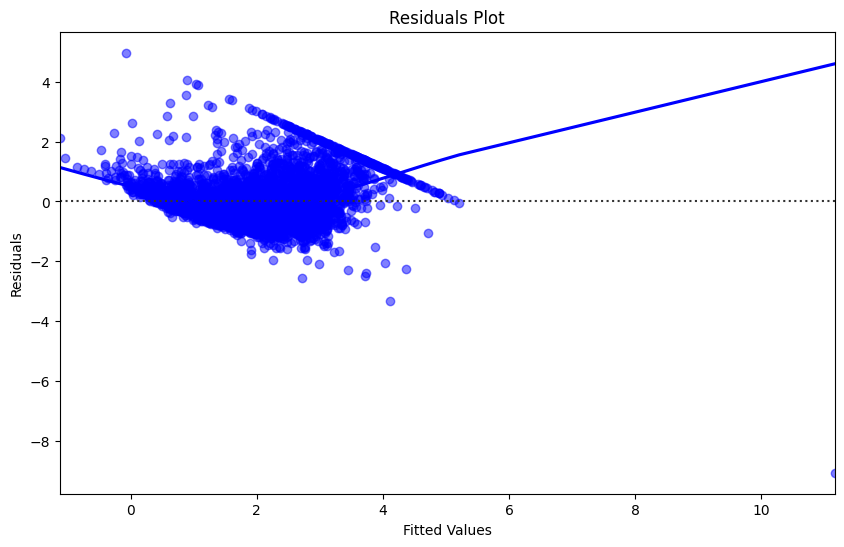

In [34]:
# 잔차 플롯
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.residplot(x=y_pred, y=residuals, lowess=True, color='blue', scatter_kws={'alpha': 0.5})
plt.title('Residuals Plot')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

In [38]:
# 계수 확인
coefficients = pd.DataFrame({'Feature': X_trasform.columns, 'Coefficient': model.coef_})
print(coefficients)

          Feature  Coefficient
0        HouseAge     0.130858
1        AveRooms    -0.246542
2       AveBedrms     0.318948
3        AveOccup    -0.030382
4        Latitude    -0.898308
5       Longitude    -0.864640
6      MedInc_log     0.808703
7  Population_log    -0.033036


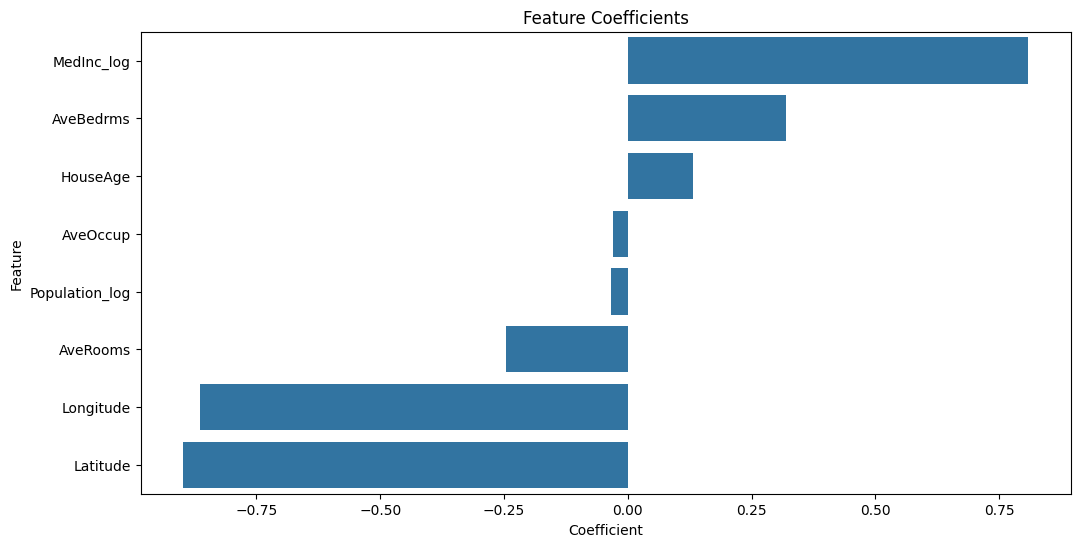

In [39]:
# 피처의 중요도 표시
plt.figure(figsize=(12, 6))
sns.barplot(x='Coefficient', y='Feature', data=coefficients.sort_values(by='Coefficient', ascending=False))
plt.title('Feature Coefficients')
plt.show()


* MAE (Mean Absolute Error) => 절대값
* MSE (Mean Squared Error) => 제곱
* RMSE (Root Mean Squared Error) => 제곱 => root
* RMSLE(Root Mean Squared Logarithmic Error) => 로그를 취하고 RMSE

### MAE(Mean Absolute Error)

* [Mean absolute error - Wikipedia](https://en.wikipedia.org/wiki/Mean_absolute_error)


$MAE = \frac{1}{n}\sum_{i=1}^{n}|y_i - \hat{y}_i|$

In [44]:
np.abs(y_test - y_pred).mean()

0.5657459489676308

In [45]:
error = abs(y_test - y_pred)
error.describe()

count    4128.000000
mean        0.565746
std         0.519535
min         0.000071
25%         0.212030
50%         0.450016
75%         0.756371
max         9.539822
Name: target, dtype: float64

### MSE(Mean Squared Error)

$MSE = \frac{1}{n} \sum\limits_{i=1}^{n} (y_i - \hat{y}_i)^2$

In [48]:
mse

0.5899196008854396

In [47]:
(error ** 2).mean()

0.5899196008854396

### RMSE(Root Mean Squared Error)

$RMSE = \sqrt{\frac{1}{n} \sum\limits_{i=1}^{n} (y_i - \hat{y}_i)^2}$

In [49]:
np.sqrt(mse)

0.7680622376379661

### RMSLE(Root Mean Squared Logarithmic Error)

$RMSLE = \sqrt{\frac{1}{n} \sum\limits_{i=1}^{n} (\log(1+y_i) - \log(1+\hat{y}_i))^2}$


In [54]:
# 1억 => 2억 => 1억 오차 2배 잘못 예측
# 100억 => 110 억 => 10억 오차 10% 잘못예측
MSLE = ((np.log1p(y_test) - np.log1p(y_pred)) ** 2).mean()
RMSLE = MSLE ** 0.5
RMSLE

<ipython-input-54-98273d20e509>:1: RuntimeWarning: invalid value encountered in log1p
  MSLE = ((np.log1p(y_test) - np.log1p(y_pred)) ** 2).mean()


0.25490888210060936